## Guide - pyLEnM package
# Case 2 - Unsupervised Learning
Welcome to the demonstration notebook where we'll go over all of the Unsupervised learning functions in the **pyLEnM** package!<br>
Let’s get started!


## Setup
Make sure to install pyLEnM from https://pypi.org/project/pylenm/ by running `pip install pylenm` in your environment terminal. Once completed, you should be able to import the package. Note: to update to the latest version of pylenm run: `pip install pylenm --upgrade`

In [1]:
# pip install pylenm

In [2]:
# Import our packages
import pylenm
from pylenm import functions, usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100) # Display a custom number of rows for dataframe

We can verify the package version by typing: `pylenm.__version__`

In [3]:
pylenm.__version__

'0.1.13.12'

In [4]:
url_1 = 'https://raw.githubusercontent.com/AurelienMeray/pylenm/master/notebooks/data/FASB_Data_thru_3Q2015_Reduced_Demo.csv'
url_2 = 'https://github.com/AurelienMeray/pylenm/blob/master/notebooks/data/FASB%20Well%20Construction%20Info.xlsx?raw=true'
concentration_data = pd.read_csv(url_1)
construction_data = pd.read_excel(url_2)

# Create instance
pylenm = functions(concentration_data) # Save concentration data
pylenm.simplify_data(inplace=True)
pylenm.setConstructionData(construction_data) # Save construction data

Successfully imported the data!

Successfully imported the construction data!



## Functions

In [5]:
usage.get_FunctionList()

pyLEnM functions:
    1) simplify_data
    2) get_MCL
    3) get_unit
    4) filter_wells
    5) remove_outliers
    6) get_analyte_details
    7) get_data_summary
    8) query_data
    9) plot_data
    10) plot_all_data
    11) plot_correlation_heatmap
    12) plot_all_correlation_heatmap
    13) interpolate_wells_by_analyte
    14) interpolate_well_data
    15) plot_corr_by_well
    16) plot_all_corr_by_well
    17) plot_corr_by_date_range
    18) plot_corr_by_year
    19) plot_MCL
    20) plot_PCA_by_date
    21) plot_PCA_by_year
    22) plot_PCA_by_well
    23) plot_coordinates_to_map
    24) getCommonDates
    25) getCleanData
    26) getJointData
    27) get_Best_GP
    28) fit_gp
    29) interpolate_topo
    30) get_Best_Wells




 The `getCleanData()` function is a useful preprocessing tool for restructuring the original concentration dataset into a more suitable structure for analysis.
 <br>Let's take a closer look at the function:

In [6]:
usage.get_FunctionDescription('getCleanData')


getCleanData (analytes)
Description: 
    Creates a table filling the data from the concentration dataset for a given analyte list where the columns are 
    multi-indexed as follows [analytes, well names] and the index is all of the dates in the dataset. 
    Many NaN should be expected.
Parameters:
    analytes (list of strings): list of analyte names to use



In [7]:
# We'll save a list of the analytes we want to look at and pass it to the functions below
# analytes = ['TRITIUM','IODINE-129','SPECIFIC CONDUCTANCE', 'PH','URANIUM-238', 'DEPTH_TO_WATER']
analytes = ['TRITIUM','SPECIFIC CONDUCTANCE', 'PH','URANIUM-238', 'DEPTH_TO_WATER']
pylenm.getCleanData(analytes)

ANALYTE_NAME    DEPTH_TO_WATER                                               \
STATION_ID             FBI 14D FBI 15D FBI 17D FEX  4 FIB  1 FIB  8 FOB  1D   
COLLECTION_DATE                                                               
1990-01-01                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-02                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-03                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-06                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-07                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
...                        ...     ...     ...    ...    ...    ...     ...   
2015-09-10                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-21                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-22                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-23                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-24                17.4    15.4   25.16    NaN    NaN    NaN     NaN   

ANALYTE_NAME                                                             \
STATION_ID      FOB  2C FOB  2D FOB 13D FOB 14C FOB 14D FOB 15D FPZ  2A   
COLLECTION_DATE                                                           
1990-01-01          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-02          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-03          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-06          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-07          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...                 ...     ...     ...     ...     ...     ...     ...   
2015-09-10          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-21          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-22          NaN     NaN     NaN     NaN   14.73     NaN     NaN   
2015-09-23          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-24          NaN     NaN    21.5     NaN     NaN     NaN     NaN   

ANALYTE_NAME                                                             \
STATION_ID      FPZ  3A FPZ  4A FPZ  6A FPZ  6B FPZ  7A FPZ  7B FPZ  8A   
COLLECTION_DATE                                                           
1990-01-01          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-02          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-03          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-06          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-07          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...                 ...     ...     ...     ...     ...     ...     ...   
2015-09-10          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-21          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-22          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-23          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-24          NaN     NaN     NaN     NaN     NaN     NaN     NaN   

ANALYTE_NAME                                                              \
STATION_ID      FPZ  8B FPZ008AR FPZ008BR FSB 76 FSB 76A FSB 76B FSB 76C   
COLLECTION_DATE                                                            
1990-01-01          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
1990-01-02          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
1990-01-03          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
1990-01-06          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
1990-01-07          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
...                 ...      ...      ...    ...     ...     ...     ...   
2015-09-10          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
2015-09-21          NaN      Na

As you can see above, there are many missing values (NaN), but thats normal since there isn't always a concentration value for each analyte, well and date 3-tuple.

The next function is called `getCommonDates()` and this is used to get insight on how many data points exist for a given range of days.
<br>Lets see an example and a plot to show how much more data can be extracted from the dataset using a lag.

In [8]:
lags = [1,3,7,12]
shared_dates = pylenm.getCommonDates(analytes=analytes, lag=lags)
shared_dates

Date Ranges Number of wells
Dates      Lag                                         
1990-01-01 1    1989-12-31 - 1990-01-02              16
           3    1989-12-29 - 1990-01-04              24
           7    1989-12-25 - 1990-01-08              41
           12   1989-12-20 - 1990-01-13              53
1990-01-02 1    1990-01-01 - 1990-01-03              14
...                                 ...             ...
2015-09-23 12   2015-09-11 - 2015-10-05              15
2015-09-24 1    2015-09-23 - 2015-09-25               8
           3    2015-09-21 - 2015-09-27              14
           7    2015-09-17 - 2015-10-01              15
           12   2015-09-12 - 2015-10-06              15

[9684 rows x 2 columns]

Let's create a plot to examine the differences in number of well data available as we increase the lag.

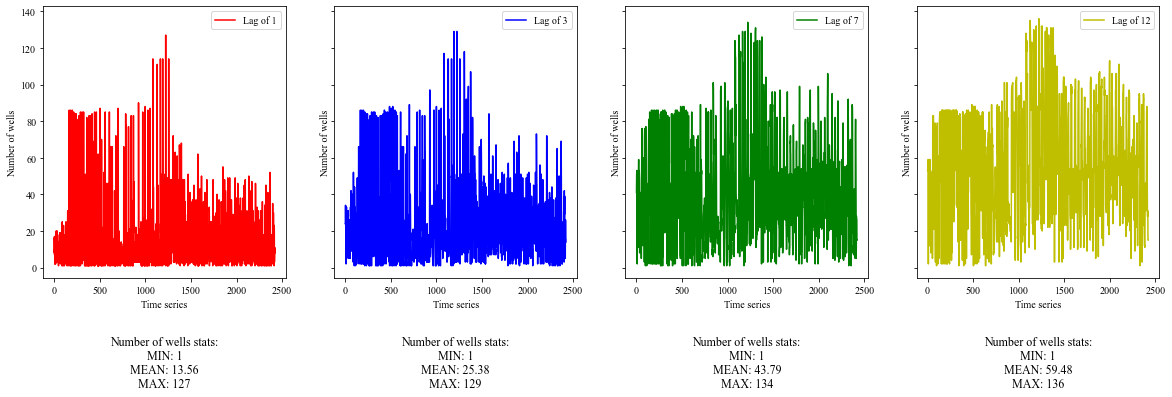

In [9]:
colors = ['r', 'b', 'g', 'y']

fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(20,5), sharex=True, sharey=True)
for i, ax in enumerate(axs):
    data = np.array(shared_dates[shared_dates.index.get_level_values('Lag')==lags[i]]['Number of wells'])
    axs[i].plot(data, color=colors[i], label='Lag of '+str(lags[i]))
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel('Time series')
    axs[i].set_ylabel('Number of wells')
    stats_text = str('Number of wells stats:\nMIN: {}\nMEAN: {}\nMAX: {}'.format(data.min(), round(data.mean(), 2), data.max()))
    axs[i].text(0.5,-0.4, stats_text, size=12, ha="center", transform=axs[i].transAxes)

As we can see, the average number of wells increases significantly as we increase the lag.
<br> With this insight, we can make a determination as to which lag is most suitable for our data. For the purpose of this demonstration we will continue the rest of the examples with a lag of 12.
<br><br> `getJointData()` takes `getCleanData()` one step further and saves the data according to the specified lag. You’ll notice that the index is no long a single date but a range of dates. The new range is (date - lag) through (date + lag).

In [10]:
lag = 12
jointData = pylenm.getJointData(analytes, lag=lag)
jointData

GENERATING DATA WITH A LAG OF 12.
Progress:
1%, 2%, 3%, 4%, 5%, 6%, 7%, 8%, 9%, 10%, 11%, 12%, 13%, 14%, 15%, 16%, 17%, 18%, 19%, 20%, 21%, 22%, 23%, 24%, 25%, 26%, 27%, 28%, 29%, 30%, 31%, 32%, 33%, 34%, 35%, 36%, 37%, 38%, 39%, 40%, 41%, 42%, 43%, 44%, 45%, 46%, 47%, 48%, 49%, 50%, 51%, 52%, 53%, 54%, 55%, 56%, 57%, 58%, 59%, 60%, 61%, 62%, 63%, 64%, 65%, 66%, 67%, 68%, 69%, 70%, 71%, 72%, 73%, 74%, 75%, 76%, 77%, 78%, 79%, 80%, 81%, 82%, 83%, 84%, 85%, 86%, 87%, 88%, 89%, 90%, 91%, 92%, 93%, 94%, 95%, 96%, 97%, 98%, 99%, Completed


ANALYTE_NAME            DEPTH_TO_WATER                                       \
STATION_ID                     FBI 14D FBI 15D FBI 17D FEX  4 FIB  1 FIB  8   
1989-12-20 - 1990-01-13            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-21 - 1990-01-14            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-22 - 1990-01-15            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-25 - 1990-01-18            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-26 - 1990-01-19            NaN     NaN     NaN    NaN    NaN    NaN   
...                                ...     ...     ...    ...    ...    ...   
2015-08-29 - 2015-09-22            NaN     NaN     NaN    NaN    NaN    NaN   
2015-09-09 - 2015-10-03           17.4    15.4   25.16    NaN    NaN    NaN   
2015-09-10 - 2015-10-04           17.4    15.4   25.16    NaN    NaN    NaN   
2015-09-11 - 2015-10-05           17.4    15.4   25.16    NaN    NaN    NaN   
2015-09-12 - 2015-10-06           17.4    15.4   25.16    NaN    NaN    NaN   

ANALYTE_NAME                                                             \
STATION_ID              FOB  1D FOB  2C FOB  2D FOB 13D FOB 14C FOB 14D   
1989-12-20 - 1990-01-13     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-21 - 1990-01-14     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-22 - 1990-01-15     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-25 - 1990-01-18     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-26 - 1990-01-19     NaN     NaN     NaN     NaN     NaN     NaN   
...                         ...     ...     ...     ...     ...     ...   
2015-08-29 - 2015-09-22     NaN     NaN     NaN     NaN     NaN   14.73   
2015-09-09 - 2015-10-03     NaN     NaN     NaN    21.5     NaN   14.73   
2015-09-10 - 2015-10-04     NaN     NaN     NaN    21.5     NaN   14.73   
2015-09-11 - 2015-10-05     NaN     NaN     NaN    21.5     NaN   14.73   
2015-09-12 - 2015-10-06     NaN     NaN     NaN    21.5     NaN   14.73   

ANALYTE_NAME                                                             \
STATION_ID              FOB 15D FPZ  2A FPZ  3A FPZ  4A FPZ  6A FPZ  6B   
1989-12-20 - 1990-01-13     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-21 - 1990-01-14     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-22 - 1990-01-15     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-25 - 1990-01-18     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-26 - 1990-01-19     NaN     NaN     NaN     NaN     NaN     NaN   
...                         ...     ...     ...     ...     ...     ...   
2015-08-29 - 2015-09-22     NaN     3.2     NaN    6.45     3.5     4.1   
2015-09-09 - 2015-10-03     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-10 - 2015-10-04     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-11 - 2015-10-05     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-12 - 2015-10-06     NaN     NaN     NaN     NaN     NaN     NaN   

ANALYTE_NAME                                                               \
STATION_ID              FPZ  7A FPZ  7B FPZ  8A FPZ  8B FPZ008AR FPZ008BR   
1989-12-20 - 1990-01-13     NaN     NaN     NaN     NaN      NaN      NaN   
1989-12-21 - 1990-01-14     NaN     NaN     NaN     NaN      NaN      NaN   
1989-12-22 - 1990-01-15     NaN     NaN     NaN     NaN      NaN      NaN   
1989-12-25 - 1990-01-18     NaN     NaN     NaN     NaN      NaN      NaN   
1989-12-26 - 1990-01-19     NaN     NaN     NaN     NaN      NaN      NaN   
...                         ...     ...     ...     ...      ...      ...   
2015-08-29 - 2015-09-22     4.6    4.05     NaN     NaN     3.73     3.77   
2015-09-09 - 2015-10-03     NaN     NaN     NaN     NaN      NaN      NaN   
2015-09-10 - 2015-10-04     NaN     NaN     NaN     NaN      NaN      NaN   
2015-09-11 - 2015-10-05     NaN     NaN     NaN     NaN      NaN      NaN   
2015-09-12 - 2015-10-06     NaN     NaN     NaN     NaN      NaN      NaN   

ANALYTE_NAME      

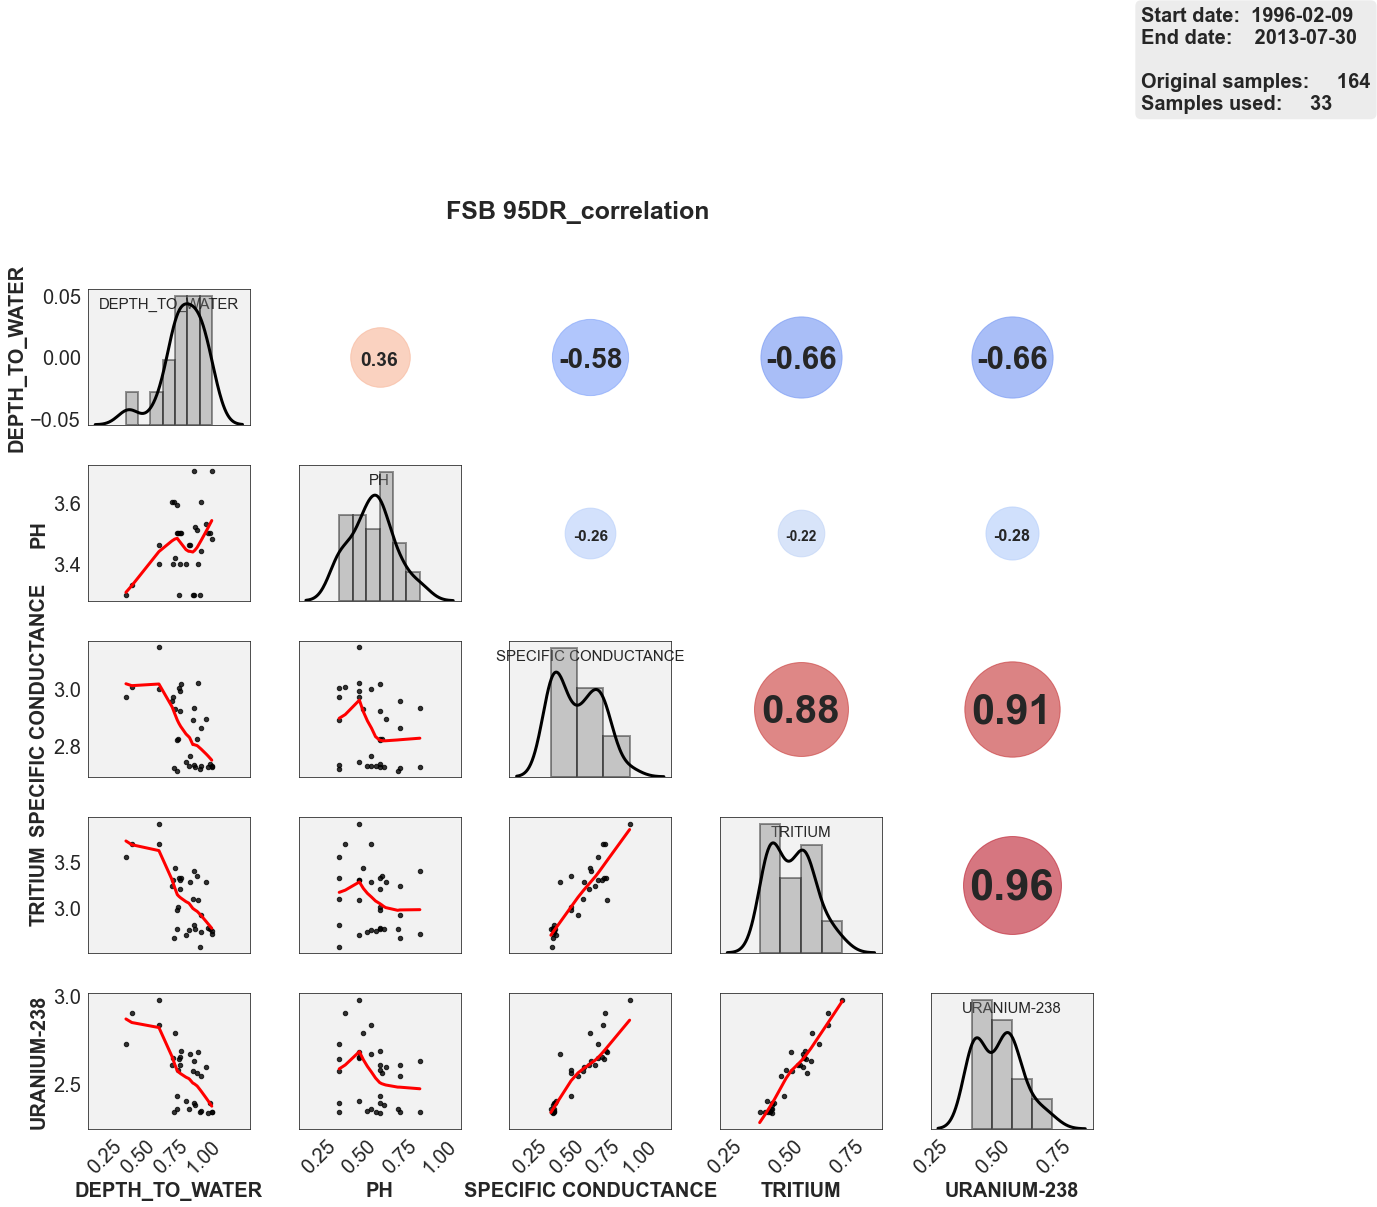

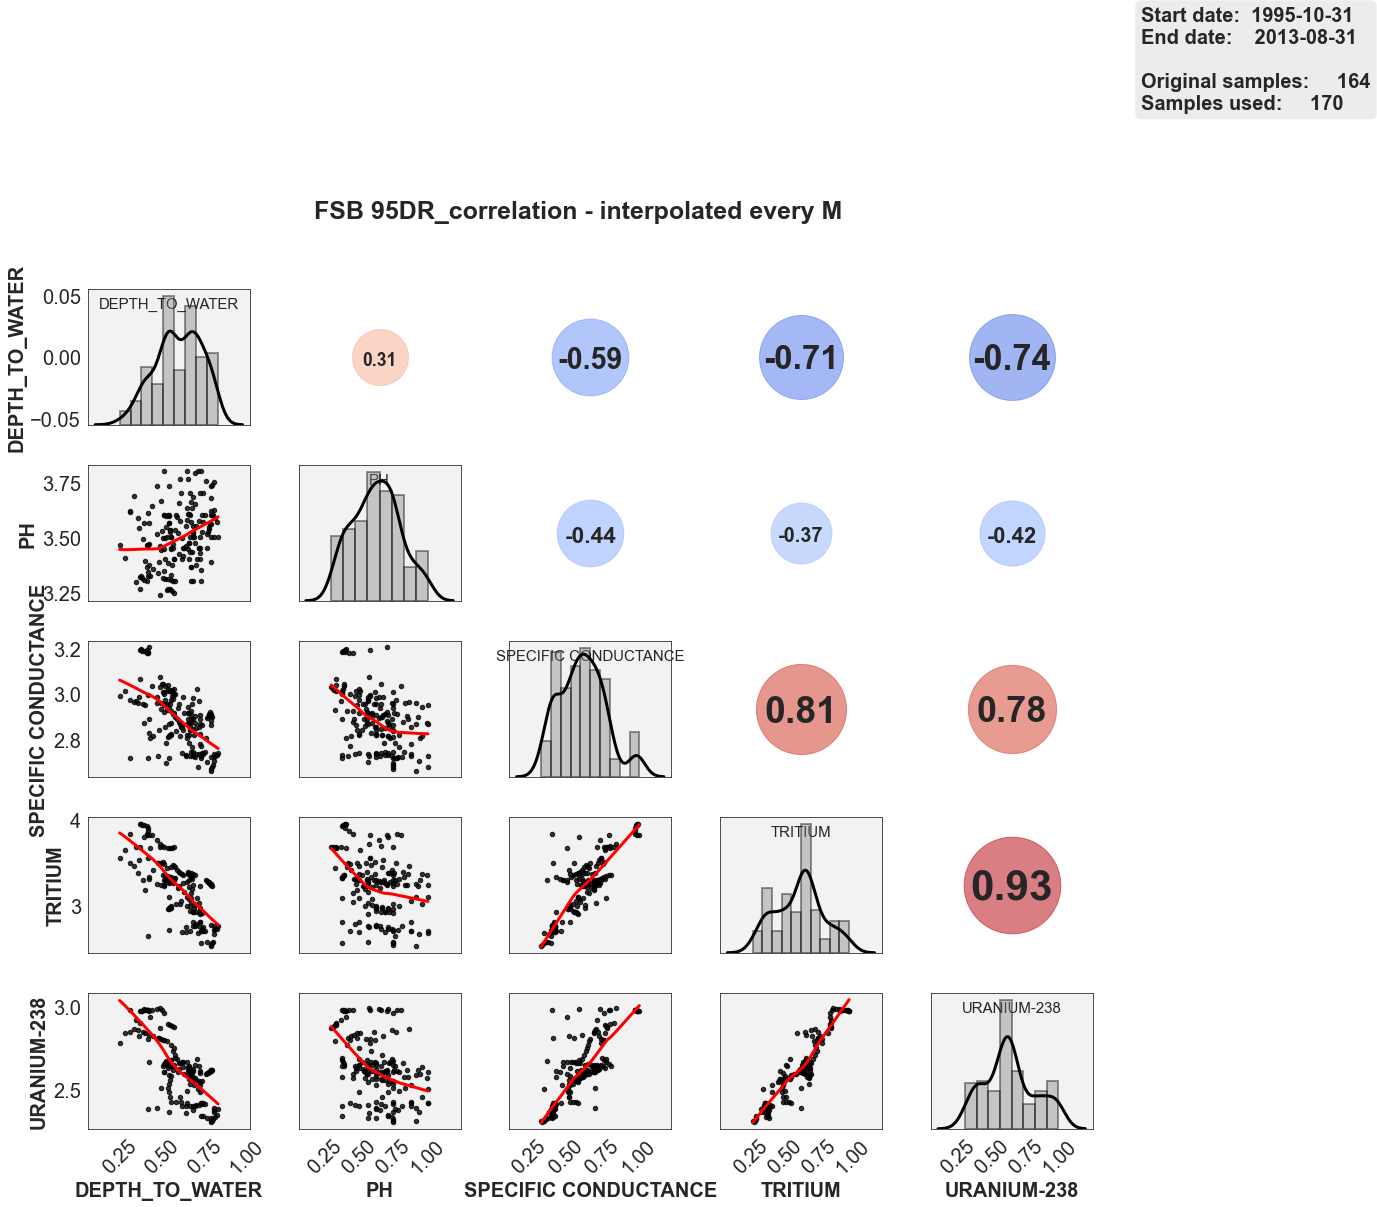

In [11]:
# analytes = ['TRITIUM','SPECIFIC CONDUCTANCE', 'PH','URANIUM-238', 'DEPTH_TO_WATER']

pylenm.plot_corr_by_well(well_name='FSB 95DR', analytes=analytes, log_transform=True, remove_outliers=True, z_threshold=1.3, remove=['1999-07-28'], no_log=['PH'])


pylenm.plot_corr_by_well(well_name='FSB 95DR', analytes=analytes,
                         interpolate=True, frequency='M', 
                         remove_outliers=True, z_threshold=1.3, log_transform=True, remove=['1999-07-28'], no_log=['PH'])

ANALYTE_NAME  DEPTH_TO_WATER     PH  SPECIFIC CONDUCTANCE   TRITIUM  \
STATION_ID                                                            
FSB 91C                66.76  4.875            314.500000    946.00   
FSB 91D                63.92  3.600            381.000000   1820.00   
FSB 93C                65.75  5.100            374.000000   1510.00   
FSB 94C                71.40  4.370           1955.000000  10200.00   
FSB 94DR               69.11  3.115           2585.000000  25000.00   
FSB 96AR              127.52  7.315            175.500000      9.06   
FSB 97A               133.39  7.070            266.333333    335.00   
FSB 97C                76.40  3.615           2095.000000  17700.00   
FSB 97D                73.88  3.735           2415.000000  20900.00   
FSB 98AR              131.98  7.280            157.000000     15.30   
FSB 98C                74.36    NaN                   NaN       NaN   
FSB 98D                71.25    NaN                   NaN       NaN   
FSB 99A               136.36  7.180            162.000000    115.00   
FSB 99C                76.59  5.390            318.500000   1700.00   
FSB 99D                78.15  4.960             36.000000     34.90   
FSB102C                 5.19  4.545            280.500000    897.00   
FSB103C                38.06  5.775            242.000000    675.00   
FSB104C                16.67  5.280            441.000000   1270.00   
FSB104D                18.65  3.720            659.500000   4920.00   
FSB114A                95.86  8.470            184.000000      0.70   
FSB114C                37.40  5.765             57.500000      3.09   
FSB114D                33.52  5.120             47.000000      8.86   

ANALYTE_NAME  URANIUM-238  
STATION_ID                 
FSB 91C              1.81  
FSB 91D            102.00  
FSB 93C              1.00  
FSB 94C             10.30  
FSB 94DR          1190.00  
FSB 96AR             1.00  
FSB 97A              1.00  
FSB 97C            622.50  
FSB 97D            559.00  
FSB 98AR             1.00  
FSB 98C               NaN  
FSB 98D               NaN  
FSB 99A              1.00  
FSB 99C              5.57  
FSB 99D              8.08  
FSB102C              1.00  
FSB103C              1.00  
FSB104C              1.00  
FSB104D            273.00  
FSB114A              1.17  
FSB114C              1.00  
FSB114D              1.00

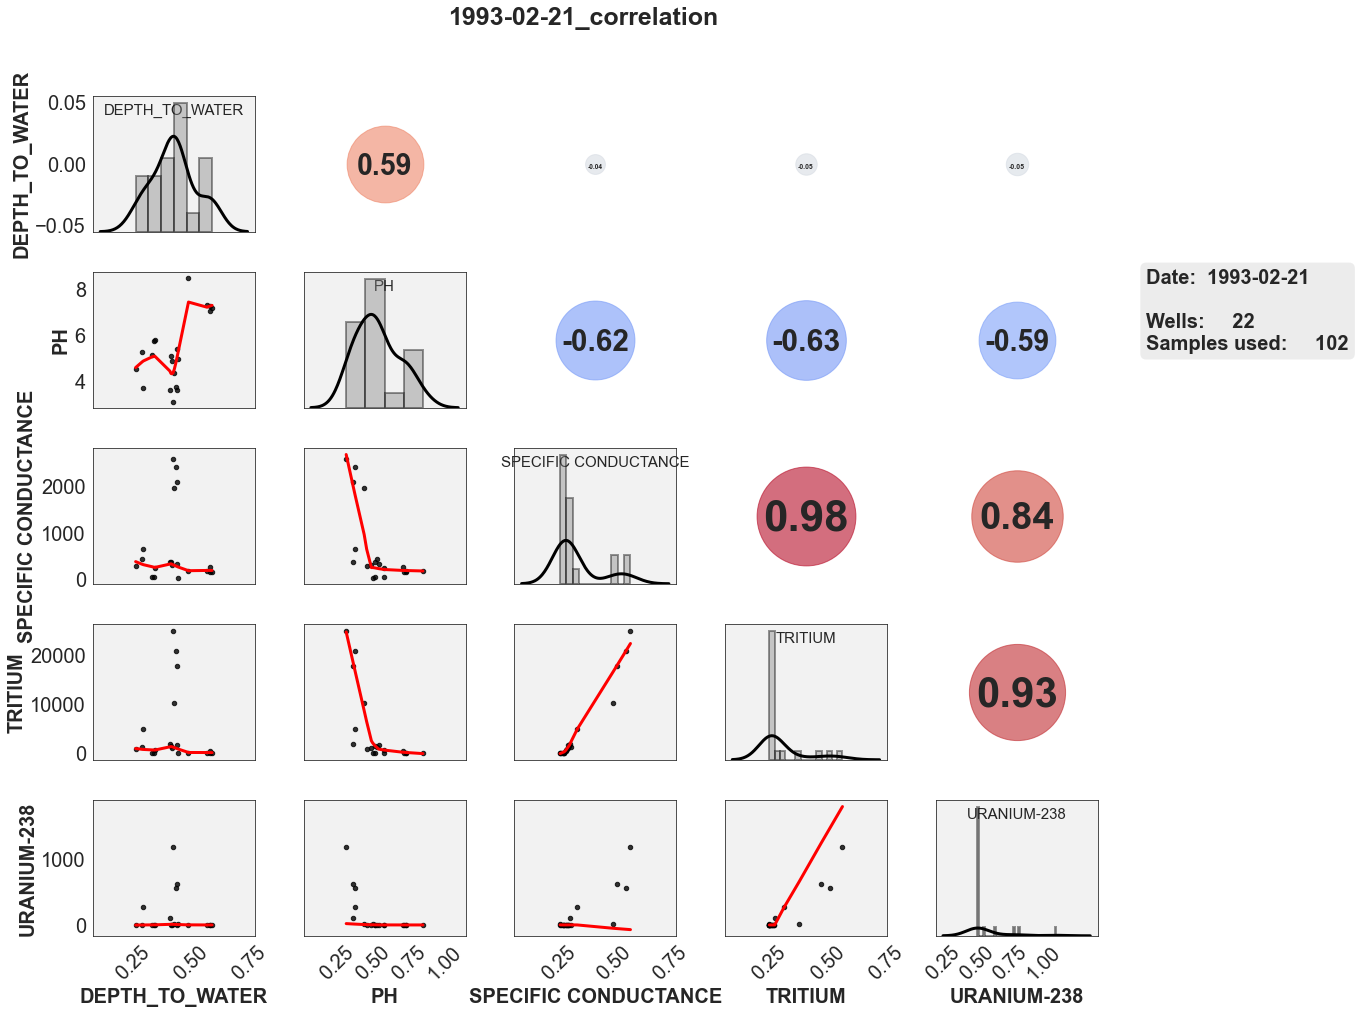

In [12]:
pylenm.plot_corr_by_date_range('1993-02-21', analytes=analytes, returnData=True)

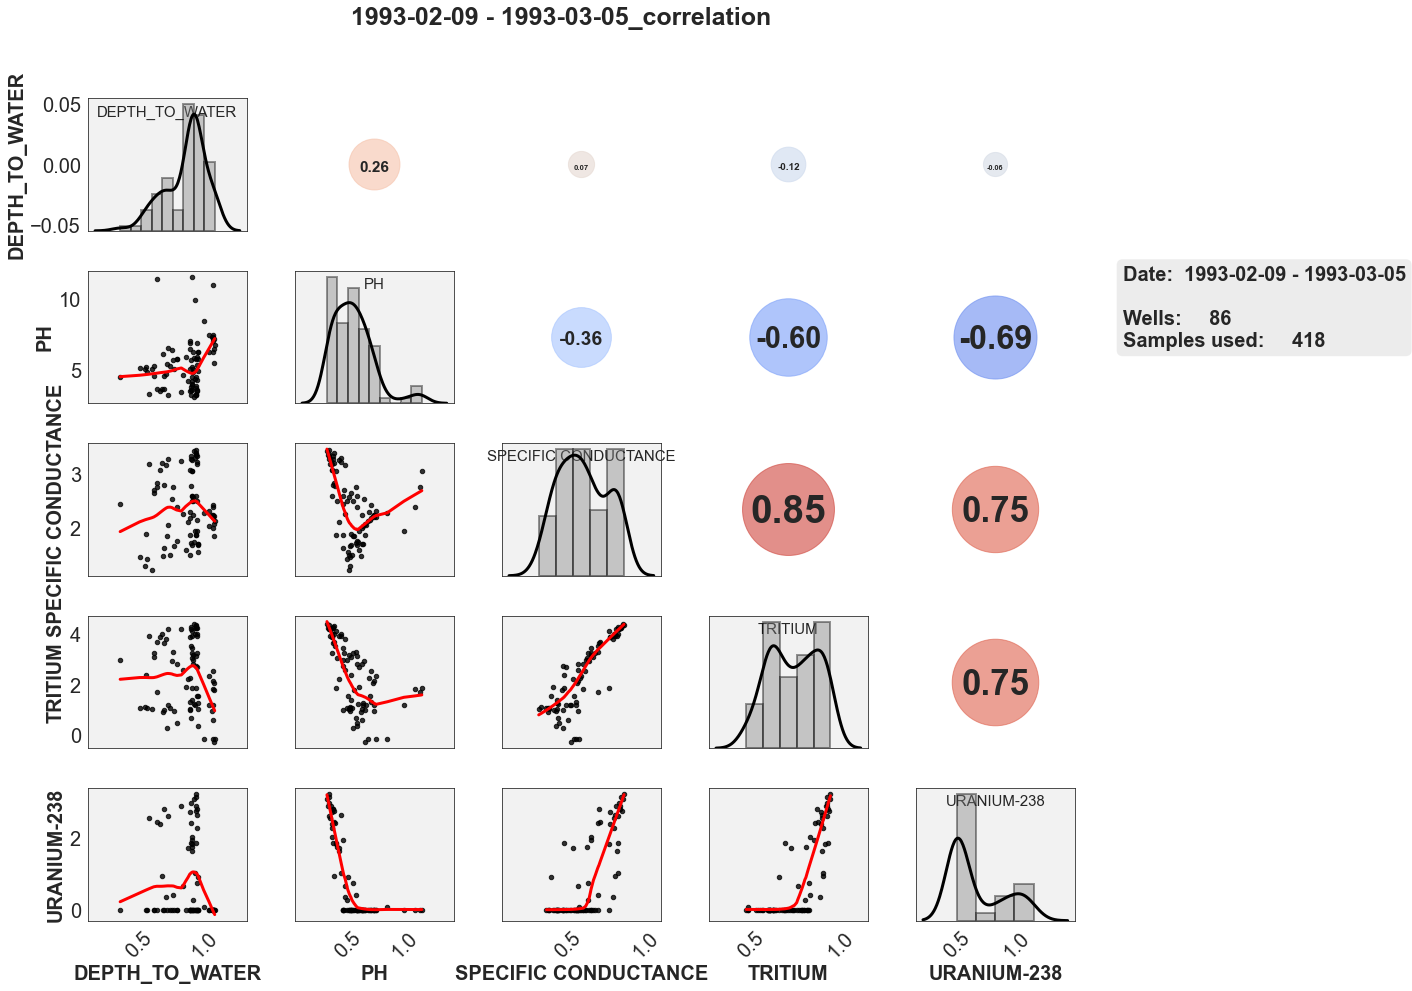

In [29]:
pylenm.plot_corr_by_date_range('1993-02-21', lag=lag, analytes=analytes, log_transform=True, no_log=['PH'])

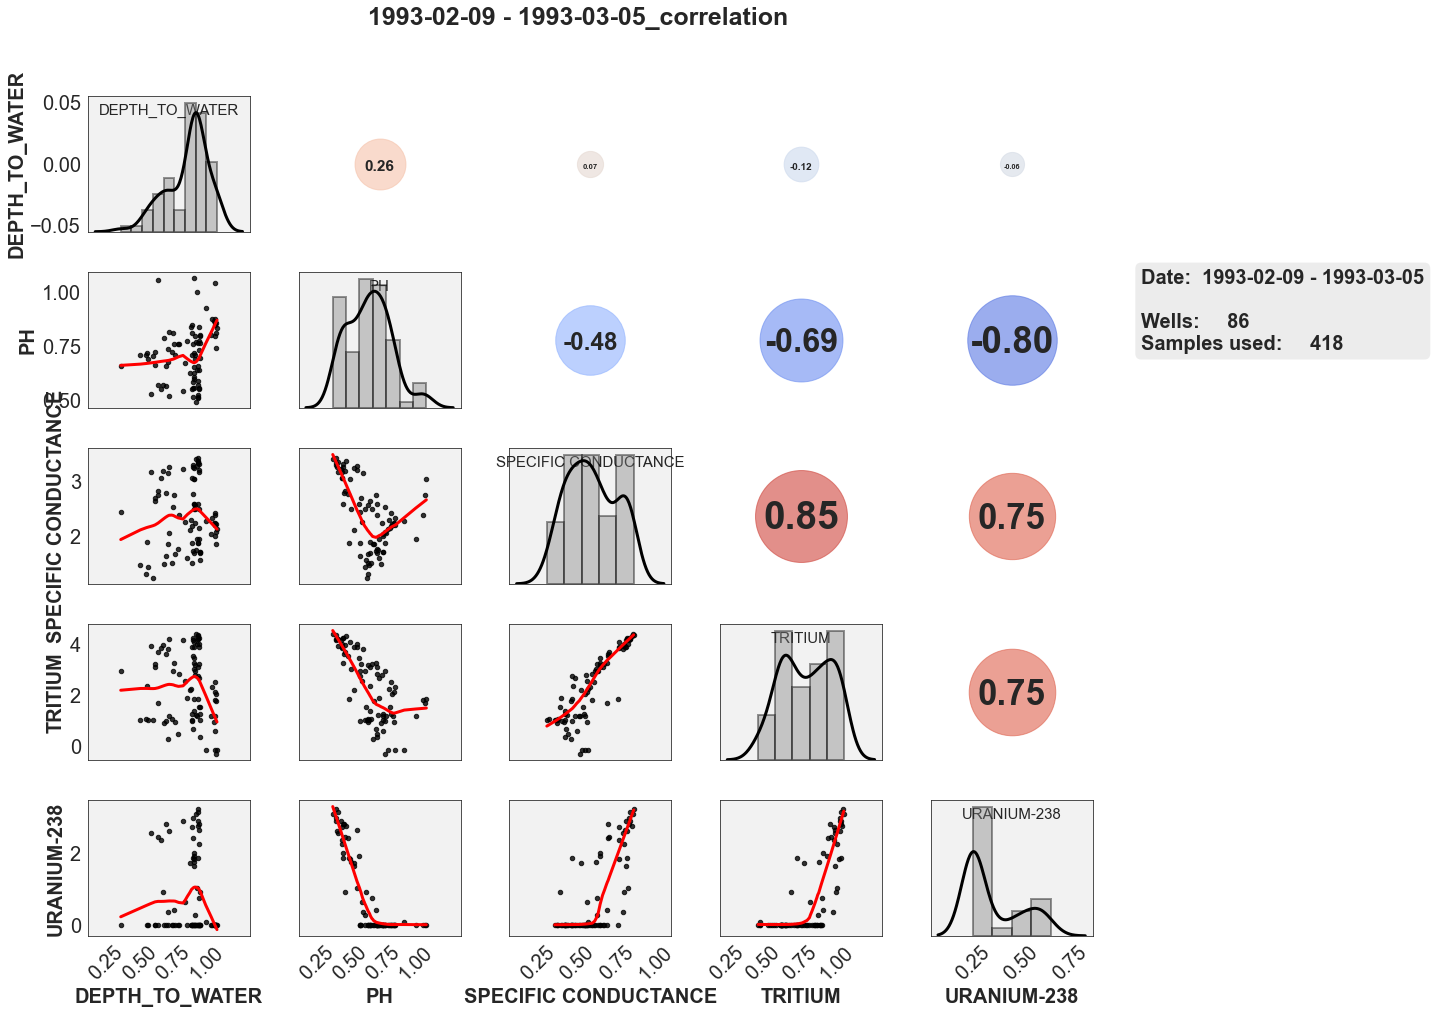

In [14]:
pylenm.plot_corr_by_date_range('1993-02-21', lag=lag, analytes=analytes, log_transform=True)

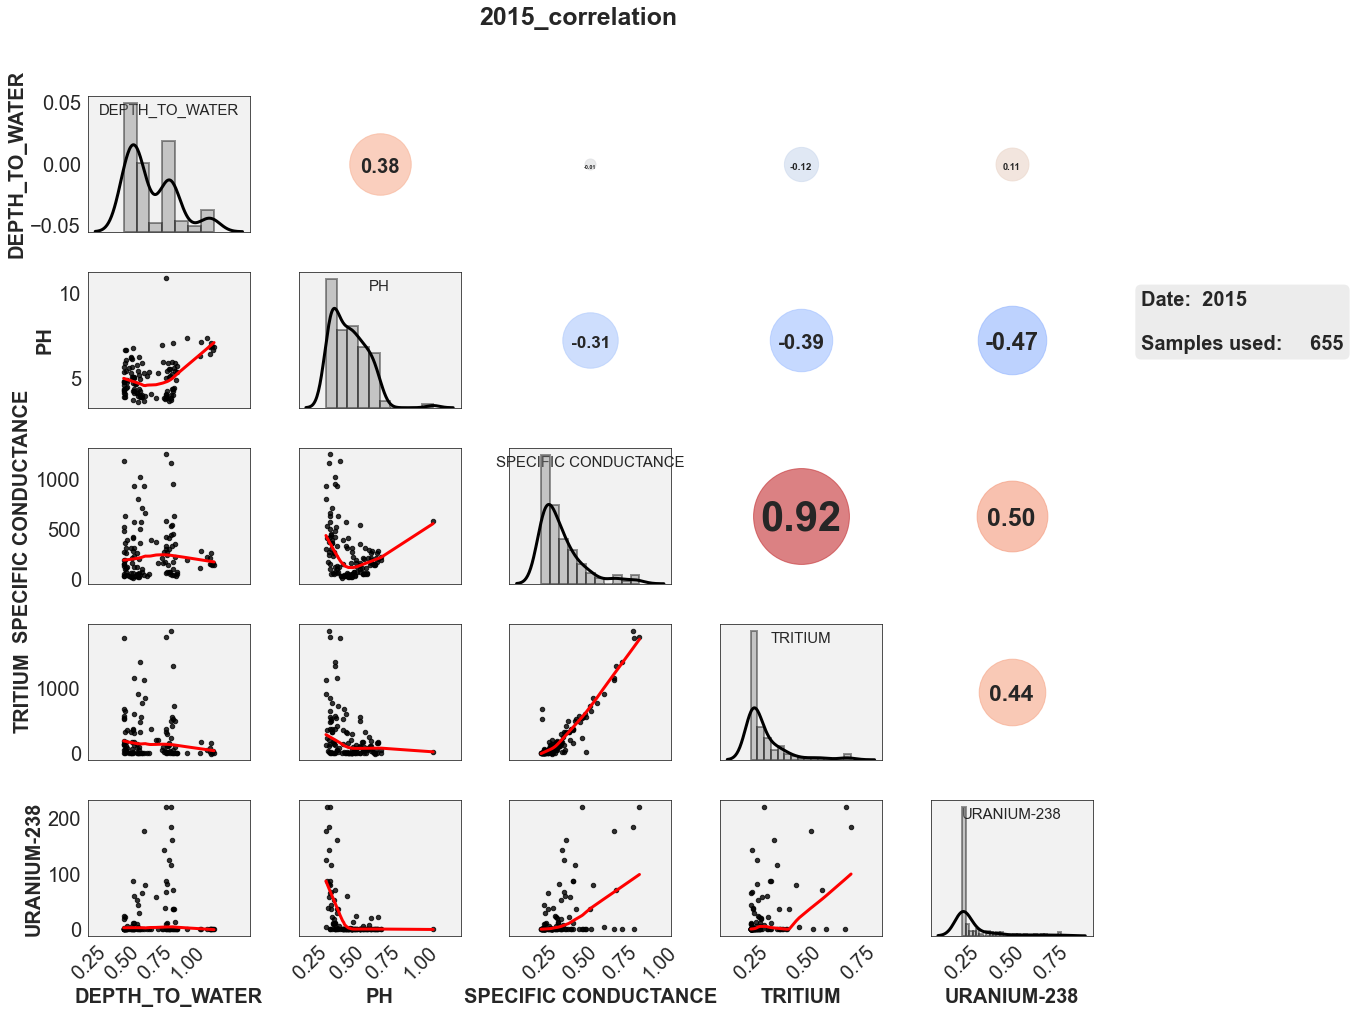

In [15]:
pylenm.plot_corr_by_year(2015, analytes=analytes, remove_outliers=True, z_threshold=3, no_log=['PH'])

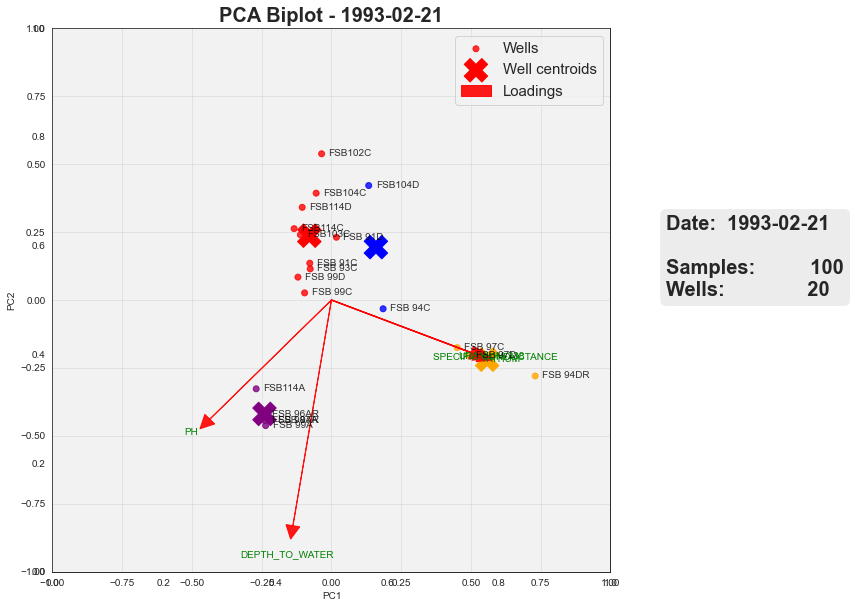

In [16]:
pylenm.plot_PCA_by_date('1993-02-21', analytes)

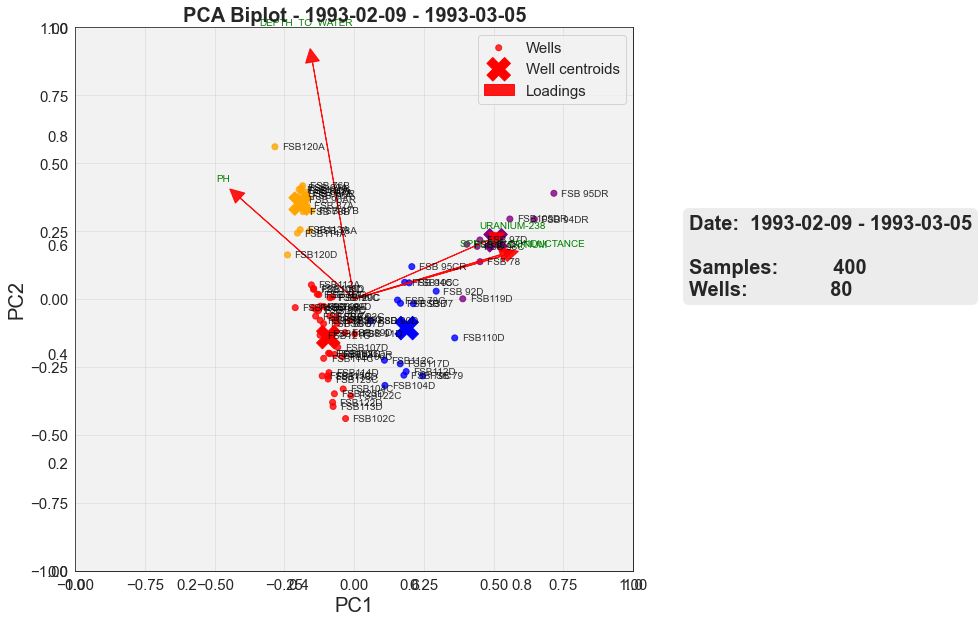

In [17]:
pylenm.plot_PCA_by_date('1993-02-21', analytes, lag=lag)

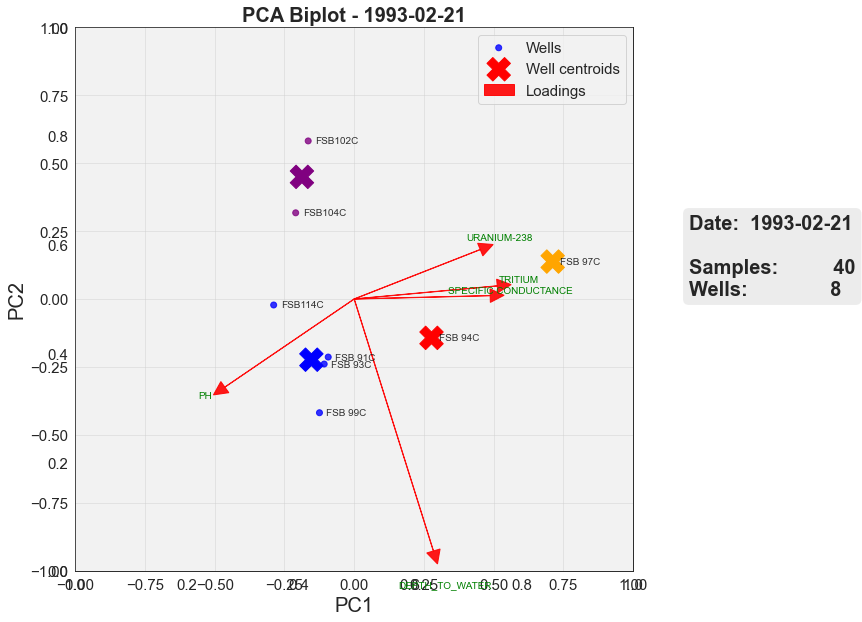

In [18]:
 pylenm.plot_PCA_by_date('1993-02-21', analytes, lag=0, filter=True, col='AQUIFER', equals=['LAZ_UTRAU'])

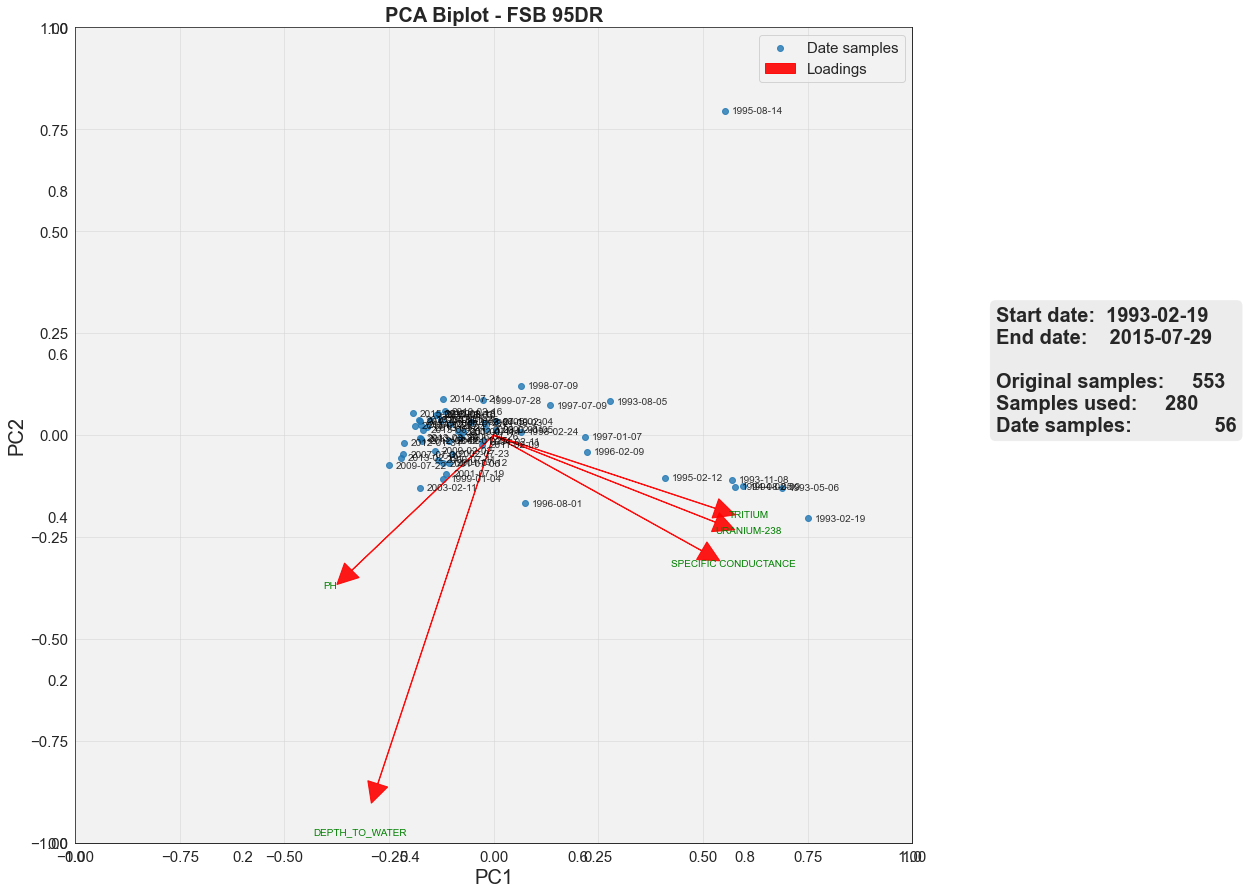

In [19]:
pylenm.plot_PCA_by_well(well_name='FSB 95DR', analytes=analytes)

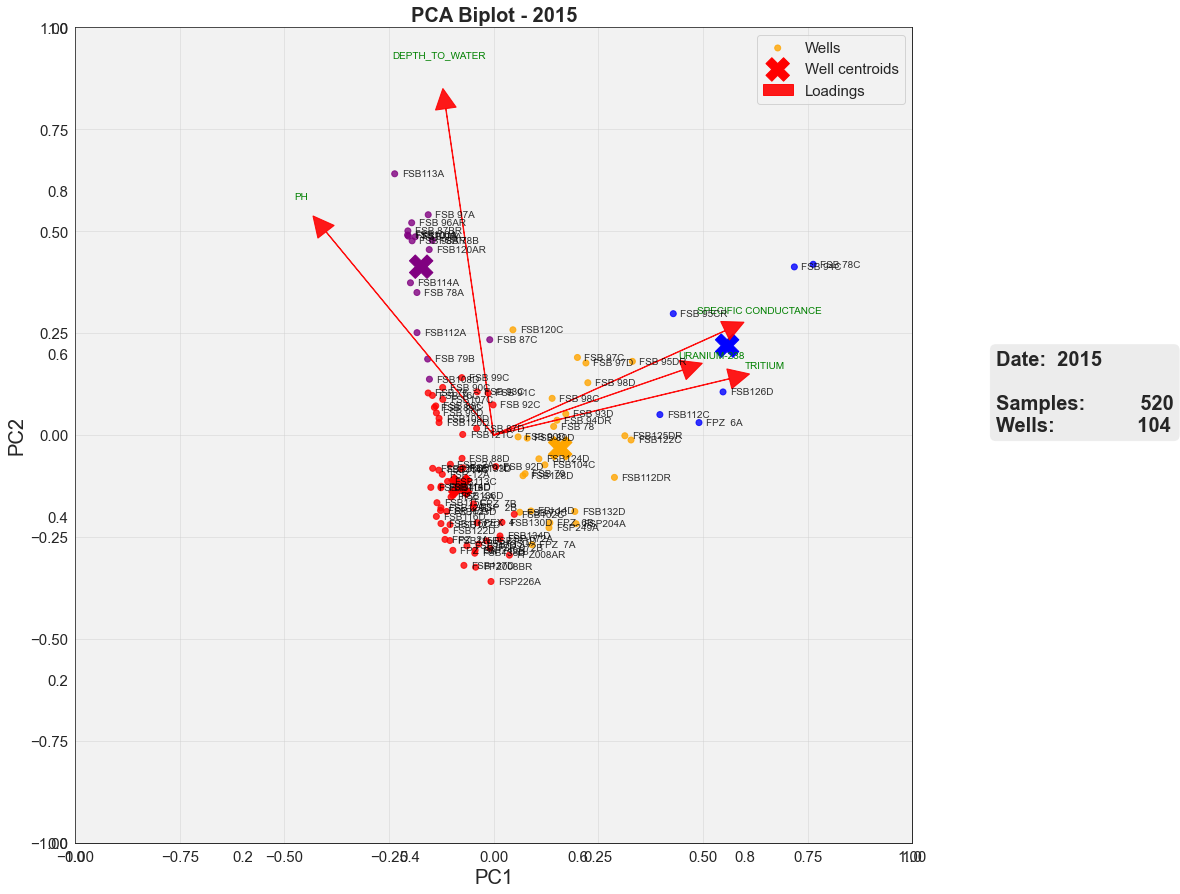

In [20]:
pylenm.plot_PCA_by_year(2015, analytes=analytes)

## Clustering

In [21]:
tritium = pylenm.interpolate_wells_by_analyte('TRITIUM', frequency='2W')
tritium = np.log10(tritium)
tritium = tritium.dropna(axis=1)
tritium

FSB122C   FSB 76B   FSB132D  FMC-002HD   FBI 14D  FSB 95CR  \
2002-12-08  3.181674 -0.303009  2.920502   2.033068  2.906720  3.568740   
2002-12-22  3.187736 -0.293665  2.920502   2.033068  2.906354  3.568405   
2003-01-05  3.193714 -0.284518  2.920502   2.033068  2.897992  3.568070   
2003-01-19  3.199611 -0.275559  2.920502   2.033068  2.886093  3.567734   
2003-02-02  3.205429 -0.288230  2.920502   2.033068  2.880910  3.567399   
...              ...       ...       ...        ...       ...       ...   
2015-08-02  3.019480 -0.043832  2.588832   1.786650  2.465210  3.132717   
2015-08-16  3.017033 -0.043832  2.598375   1.820319  2.459392  3.133539   
2015-08-30  3.017033 -0.043832  2.599883   1.843967  2.459392  3.133539   
2015-09-13  3.017033 -0.043832  2.599883   1.856124  2.459392  3.133539   
2015-09-27  3.017033 -0.043832  2.599883   1.856124  2.459392  3.133539   

             FSB 98A   FOB  2C   FSB117D   FSB127D   FSB110D   FSB116C  \
2002-12-08  1.117271  3.366642  3.198485  2.680709  2.836826  0.874275   
2002-12-22  1.117271  3.366642  3.193646  2.680709  2.820984  0.872181   
2003-01-05  1.117271  3.366642  3.188753  2.680709  2.804543  0.870078   
2003-01-19  1.117271  3.366642  3.183803  2.680709  2.787455  0.867964   
2003-02-02  1.117271  3.366642  3.178797  2.680709  2.767496  0.865840   
...              ...       ...       ...       ...       ...       ...   
2015-08-02  1.117271  3.366642  0.168819  1.354133  2.303196  0.396199   
2015-08-16  1.117271  3.366642  0.167317  1.356026  2.303196  0.396199   
2015-08-30  1.117271  3.366642  0.167317  1.356026  2.303196  0.396199   
2015-09-13  1.117271  3.366642  0.167317  1.356026  2.303196  0.396199   
2015-09-27  1.117271  3.366642  0.167317  1.356026  2.303196  0.396199   

             FSP249A   FBI 17D   FSB 79B  FSB121DR   FSB115D   FSB 99D  \
2002-12-08  3.296857  3.223671  1.786633  0.826799  0.753364  3.106834   
2002-12-22  3.292115  3.270211  1.789933  0.828015  0.750288  3.095324   
2003-01-05  3.284585  3.277874  1.793208  0.829228  0.747190  3.083499   
2003-01-19  3.276922  3.276387  1.796459  0.830438  0.744069  3.071344   
2003-02-02  3.269122  3.274895  1.800320  0.831644  0.740926  3.058839   
...              ...       ...       ...       ...       ...       ...   
2015-08-02  2.732571  2.743902  1.775338  2.873902  0.250420  0.872779   
2015-08-16  2.730995  2.743902  1.775246  2.873902  0.250420  0.866878   
2015-08-30  2.729413  2.743902  1.775246  2.873902  0.250420  0.866878   
2015-09-13  2.727907  2.743902  1.775246  2.873902  0.250420  0.866878   
2015-09-27  2.727541  2.743902  1.775246  2.873902  0.250420  0.866878   

            FMC-002F   FSB104D   FSB 79A   FAS-091   FSB113C    FSB 78  \
2002-12-08  2.118855  1.154622  1.150809  2.442409  1.595075  3.472482   
2002-12-22  2.187352  1.125442  1.163680  2.442409  1.591948  3.468193   
2003-01-05  2.153092  1.094160  1.176180  2.442409  1.588797  3.463862   
2003-01-19  2.127437  1.060448  1.188330  2.442409  1.585624  3.459487   
2003-02-02  2.115591  1.022947  1.199501  2.442409  1.582427  3.455067   
...              ...       ...       ...       ...       ...       ...   
2015-08-02  1.806751  0.788846  0.296665  2.294466  1.879211  1.204764   
2015-08-16  1.816847  0.775538  0.296665  2.294466  1.878522  1.195900   
2015-08-30  1.872849  0.771440  0.296665  2.294466  1.878522  1.195900   
2015-09-13  1.862453  0.767304  0.296665  2.294466  1.878522  1.195900   
2015-09-27  1.829304  0.763659  0.296665  2.294466  1.878522  1.195900   

             FSB141D    FM-2BD   FSB139D  FPZ008AR  FSB120AR    FIB  1  \
2002-12-08  0.508339  2.050067  1.683682  2.583793  1.763278  2.167317   
2002-12-22  0.508339  2.117518  1.683682  2.583793  1.762566  2.167317   
2003-01-05  0.508339  2.119957  1.683682  2.583793  1.761514  2.167317   
2003-01-19  0.508339  2.121874  1.683682  2.583793  1.760460  2.167317   
2003-02-02  0.508339  2.127597  1.683682  2.583793  1.759403  2.167317   
.

In [22]:
elements = tritium.shape[0]
rptData = pd.DataFrame(columns=['station_id', 'ratio_repeated'])
for well in tritium.columns:
    try:
        occurance = tritium[well].duplicated().value_counts()[True]
    except KeyError:
        occurance = 0
    rptData = rptData.append({'station_id': well, 'ratio_repeated': occurance/elements}, ignore_index=True)
std_ratio = rptData.describe().T['std'].values[0]
bad_wells = rptData[rptData['ratio_repeated']>1.5*std_ratio]
bad_well_names = bad_wells.station_id.to_list()
print("Bad wells: {}\nRemaining wells: {}".format(len(bad_well_names),elements-len(bad_well_names)))
tritium = tritium.drop(bad_well_names, axis=1)

Bad wells: 44
Remaining wells: 291


(335, 112)
(136, 112)


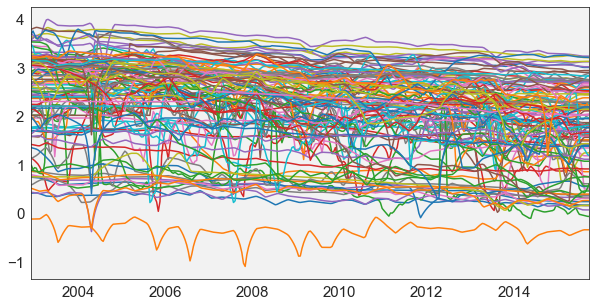

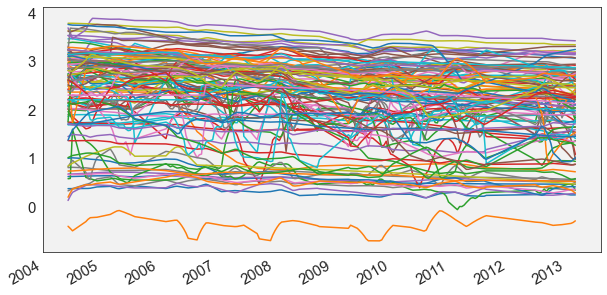

In [23]:
tritium.plot(legend=False, figsize=(10,5))
pylenm.remove_outliers(tritium, z_threshold=2.5).plot(legend=False, figsize=(10,5))
tritium_rm = pylenm.remove_outliers(tritium, z_threshold=2.5)
print(tritium.shape)
print(tritium_rm.shape)

In [24]:
pylenm.get_Construction_Data().head()

FACILITY_ID SITE_GROUP  \
STATION_ID                          
FAI001A            SRS        GSA   
FAI001B            SRS        GSA   
FAI001C            SRS        GSA   
FAI001D            SRS        GSA   
FAI002A            SRS        GSA   

                                                    SITE_NAME  \
STATION_ID                                                      
FAI001A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001B     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001C     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001D     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI002A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   

               STATION_TYPE               WELL USE    AQUIFER  \
STATION_ID                                                      
FAI001A     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001B     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001C     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001D     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI002A     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   

                        WELL_USE   LATITUDE  LONGITUDE     EASTING  \
STATION_ID                                                           
FAI001A     ACTIVE ECO-SENSITIVE  33.273872 -81.622904  441989.564   
FAI001B     ACTIVE ECO-SENSITIVE  33.273873 -81.622891  441990.781   
FAI001C     ACTIVE ECO-SENSITIVE  33.273874 -81.622895  441990.432   
FAI001D     ACTIVE ECO-SENSITIVE  33.273874 -81.622901  441989.928   
FAI002A     ACTIVE ECO-SENSITIVE  33.263961 -81.685462  436156.287   

               NORTHING  SZ_TOP(FT MSL)  SZ_BOT(FT MSL)  GROUND_ELEVATION  \
STATION_ID                                                                  
FAI001A     3681629.999          232.30          231.30             250.1   
FAI001B     3681630.192          241.60          240.60             250.2   
FAI001C     3681630.247          243.68          242.68             250.2   
FAI001D     3681630.223          247.75          246.75             250.1   
FAI002A     3680567.719          166.88          165.88             185.1   

           REFERENCE_ELEVATION_CODE  REFERENCE_ELEVATION  TOTAL_DEPTH  \
STATION_ID                                                              
FAI001A                           C               252.63        19.10   
FAI001B                           C               252.73         9.90   
FAI001C                           C               252.74         7.82   
FAI001D                           C               252.56         3.65   
FAI002A                           C               187.58         3.65   

            CONSTR_OBJ_DIAMETER CONSTR_OBJ_MATERIAL PUMP_TYPE COMPLETION_DATE  \
STATION_ID                                                                      
FAI001A                     2.0                 PVC      NONE      2016-03-22   
FAI001B                     2.0                 PVC      NONE      2016-03-22   
FAI001C                     2.0                 PVC      NONE      2016-03-22   
FAI001D                     2.0                 PVC      NONE      2016-03-22   
FAI002A                     2.0                 PVC      NONE      2016-03-29   

           DATE_SEALED  
STATION_ID              
FAI001A            NaT  
FAI001B            NaT  
FAI001C            NaT  
FAI001D            NaT  
FAI002A            NaT

['FPZ008AR', 'FSB 94DR', 'FSB133D', 'FSB130D', 'FSP  2A', 'FSP-072B', 'FSB135D', 'FSB115D', 'FPZ  6A', 'FSB123D', 'FSB122D', 'FBI 14D', 'FPZ  6B', 'FSB 76', 'FSB117D', 'FSB124D', 'FPZ  7B', 'FSB104D', 'FSP204A', 'FSB109D', 'FSB128D', 'FSP  2B', 'FSP-072A', 'FSB 99D', 'FSB 88D', 'FSP-12A', 'FPZ  2A', 'FSP 47A', 'FSB 79', 'FSB136D', 'FSB138D', 'FSB 90D', 'FSB 89D', 'FSB127D', 'FSP249B', 'FEX  4', 'FPZ008BR', 'FSB108D', 'FSB137D', 'FSB 93D', 'FOB 14D', 'FSP249A', 'FSB112DR', 'FSB114D', 'FOB 13D', 'FSB120D', 'FPZ  3A', 'FSB118D', 'FSB 98D', 'FPZ  7A', 'FSB 97D', 'FSP226A', 'FSB 87D', 'FSB134D', 'FSB 92D', 'FSB129D', 'FPZ  4A', 'FSB126D', 'FSB116D', 'FSB 91D', 'FSB 95DR', 'FSB132D', 'FSB125DR', 'FSB 78']


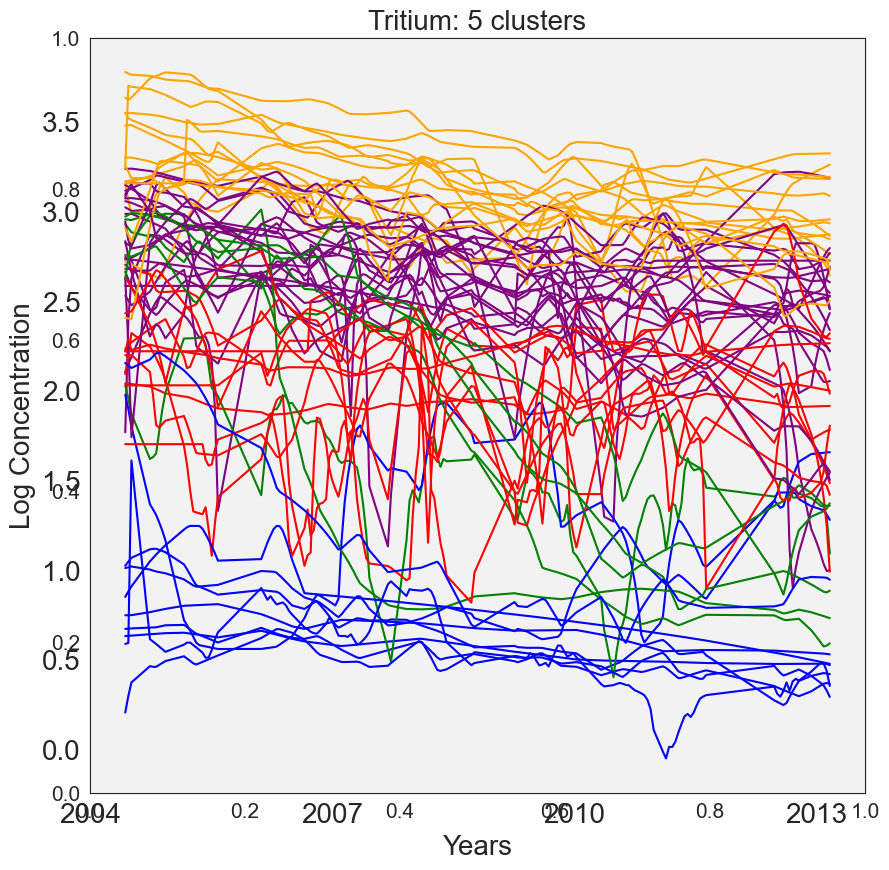

In [25]:
cluster_data = pylenm.cluster_data(analyte_name= 'Tritium', data = tritium_rm, n_clusters=5, year_interval=3, return_clusters=True, filter=True, col='AQUIFER', equals=['UAZ_UTRAU'], y_label = 'Log Concentration')

In [26]:
cluster_data[['STATION_ID', 'color']].head()

STATION_ID   color
0    FBI 14D  orange
1     FEX  4     red
2    FOB 13D  purple
3    FOB 14D  orange
4    FPZ  2A    blue

In [27]:
pylenm.plot_coordinates_to_map(cluster_data)

Map(center=[33.271459, -81.675873], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…